In [1]:
# usual imports 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn and category encoders
from sklearn.model_selection import train_test_split
#from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

EDA OF LOAN DATA

UPLOADING THE DATA

In [2]:
loan = pd.read_csv("./archive(1)/loan.csv")

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan["loan_status"]

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [6]:
loan["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [7]:
loan['loan_status'].value_counts(normalize=True)

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

DROP ALL COLUMNS WHICH HAVE NO DATA

In [8]:
loan_new = loan.dropna(axis = 1, how = 'all')

In [9]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
loan_new['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [11]:
loan_new['status_of_loans'] = loan_new['loan_status'].map({"Fully Paid":0, "Current":1, "Charged Off":2})

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
loan_new['status_of_loans'].head(20)

0     0
1     2
2     0
3     0
4     1
5     0
6     0
7     0
8     2
9     2
10    0
11    0
12    2
13    0
14    2
15    0
16    0
17    0
18    0
19    0
Name: status_of_loans, dtype: int64

Status_of_Loan TO BE PREDICTED 

In [13]:
loan_new['loan_status'].head(20)

0      Fully Paid
1     Charged Off
2      Fully Paid
3      Fully Paid
4         Current
5      Fully Paid
6      Fully Paid
7      Fully Paid
8     Charged Off
9     Charged Off
10     Fully Paid
11     Fully Paid
12    Charged Off
13     Fully Paid
14    Charged Off
15     Fully Paid
16     Fully Paid
17     Fully Paid
18     Fully Paid
19     Fully Paid
Name: loan_status, dtype: object

In [14]:
loan_new['grade_of_loans'] = loan_new['grade'].map({"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1})

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
loan_new['grade_of_loans']

0        6
1        5
2        5
3        5
4        6
        ..
39712    7
39713    5
39714    7
39715    7
39716    3
Name: grade_of_loans, Length: 39717, dtype: int64

In [16]:
loan_new['grade']

0        B
1        C
2        C
3        C
4        B
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 39717, dtype: object

In [17]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [18]:
loan_new['grade'].value_counts(normalize=True)

B    0.302641
A    0.253921
C    0.203893
D    0.133620
E    0.071556
F    0.026412
G    0.007956
Name: grade, dtype: float64

GRADE IS A CATEGORICAL VARIABLE TO BE ONEHOTENCODED

In [19]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [22]:
loan_new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [23]:
loan_new.to_csv("./archive(1)/loan_new.csv")

VARIABLES TO DROP FROM THE FILE FOR DATA CLEANING

In [24]:
colsToDrop = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", 
 "title", "zip_code", "delinq_2yrs", 
 "mths_since_last_record", "revol_bal", "initial_list_status", 
 "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv",
 "total_rec_prncp", "total_rec_int", "total_rec_late_fee", 
 "collection_recovery_fee", "last_pymnt_d", 
 "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", 
 "collections_12_mths_ex_med", "policy_code", "acc_now_delinq",
 "chargeoff_within_12_mths", "tax_liens", 
 "application_type", "pub_rec_bankruptcies", "addr_state"]

In [25]:
colsToDrop

['id',
 'member_id',
 'funded_amnt',
 'emp_title',
 'pymnt_plan',
 'url',
 'desc',
 'title',
 'zip_code',
 'delinq_2yrs',
 'mths_since_last_record',
 'revol_bal',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'tax_liens',
 'application_type',
 'pub_rec_bankruptcies',
 'addr_state']

In [26]:
loan_new.drop(colsToDrop, axis=1, inplace=True)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  dti                     39717 non-null

In [28]:
loan_new.to_csv("./archive(1)/loan_new_updated.csv")

In [29]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  dti                     39717 non-null

In [30]:
NewLoans = loan_new[['loan_amnt', 'term']]

In [31]:
loan_new['life'] = loan_new['term'].str.extract("(\d*\.?\d+)", expand=True)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
loan_new['life']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: life, Length: 39717, dtype: object

In [33]:
loan_new['life_new'] = pd.to_numeric(loan_new['life'], errors='coerce')

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  dti                     39717 non-null

In [35]:
loan_new.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,recoveries,delinq_amnt,status_of_loans,grade_of_loans,life,life_new
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,NaN,3,0,83.70%,9,0.00,0,0,6,36,36
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,NaN,3,0,9.40%,4,117.08,0,2,5,60,60
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,NaN,2,0,98.50%,10,0.00,0,0,5,36,36
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,35.0,10,0,21%,37,0.00,0,0,5,36,36
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,38.0,15,0,53.90%,38,0.00,0,1,6,60,60


In [36]:
loan_new['interest_rate'] = loan_new['int_rate'].str.extract("(\d*\.?\d+)", expand=True)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
loan_new['interest_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: interest_rate, Length: 39717, dtype: object

In [38]:
loan_new['interest_rate_new'] = pd.to_numeric(loan_new['interest_rate'], errors='coerce')

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
loan_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  dti                     39717 non-null

In [40]:
loan_subset = loan_new[(loan_new['status_of_loans'] == 0) | (loan_new['status_of_loans'] == 2)]

In [41]:
loan_subset.shape

(38577, 30)

In [42]:
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt_inv         38577 non-null  float64
 2   term                    38577 non-null  object 
 3   int_rate                38577 non-null  object 
 4   installment             38577 non-null  float64
 5   grade                   38577 non-null  object 
 6   sub_grade               38577 non-null  object 
 7   emp_length              37544 non-null  object 
 8   home_ownership          38577 non-null  object 
 9   annual_inc              38577 non-null  float64
 10  verification_status     38577 non-null  object 
 11  issue_d                 38577 non-null  object 
 12  loan_status             38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  dti                     38577 non-null

In [43]:
X = loan_subset[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'grade_of_loans', 'annual_inc', 'recoveries', 'sub_grade']]

In [44]:
X.to_csv("./archive(1)/X.csv")

In [45]:
X.head()

,loan_amnt,life_new,interest_rate_new,installment,grade_of_loans,annual_inc,recoveries,sub_grade
0,5000,36,10.65,162.87,6,24000.0,0.00,B2
1,2500,60,15.27,59.83,5,30000.0,117.08,C4
2,2400,36,15.96,84.33,5,12252.0,0.00,C5
3,10000,36,13.49,339.31,5,49200.0,0.00,C1
5,5000,36,7.90,156.46,7,36000.0,0.00,A4


In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
X.shape

(38577, 8)

In [48]:
y = loan_subset['status_of_loans']

In [49]:
y.to_csv("./archive(1)/y.csv")

In [50]:
y.value_counts()

0    32950
2     5627
Name: status_of_loans, dtype: int64

## MODELING A CATEGORICAL VARIABLE AND CONCATING THE TWO DATAFRAMES TOGETHER

In [51]:
X11 = loan_subset[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'grade', 'annual_inc','recoveries', 'sub_grade' ]]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X11, y, stratify =y, random_state = 24)

In [53]:
X_train

,loan_amnt,life_new,interest_rate_new,installment,grade,annual_inc,recoveries,sub_grade
25029,24250,60,11.49,533.20,B,95000.0,0.0,B4
19392,6000,36,11.11,196.75,B,59366.0,0.0,B5
29889,13000,36,7.14,402.24,A,92508.0,0.0,A3
25903,8000,36,11.86,265.18,B,39432.0,0.0,B5
36341,22800,36,12.21,759.58,B,43000.0,0.0,B5
...,...,...,...,...,...,...,...,...
30909,8000,36,10.25,259.08,B,52000.0,0.0,B2
25135,24000,60,17.56,603.72,E,96000.0,1003.1,E4
9831,12000,36,11.99,398.52,B,112000.0,0.0,B5
6858,3000,36,7.90,93.88,A,39000.0,0.0,A4


In [54]:
X_train_s = X_train[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'annual_inc', 'recoveries']]

In [55]:
X_train_s

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries
25029,24250,60,11.49,533.20,95000.0,0.0
19392,6000,36,11.11,196.75,59366.0,0.0
29889,13000,36,7.14,402.24,92508.0,0.0
25903,8000,36,11.86,265.18,39432.0,0.0
36341,22800,36,12.21,759.58,43000.0,0.0
...,...,...,...,...,...,...
30909,8000,36,10.25,259.08,52000.0,0.0
25135,24000,60,17.56,603.72,96000.0,1003.1
9831,12000,36,11.99,398.52,112000.0,0.0
6858,3000,36,7.90,93.88,39000.0,0.0


In [56]:
X_test_s = X_test[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'annual_inc', 'recoveries']]

In [57]:
X_test_s

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries
34972,5000,36,7.74,156.10,100000.0,0.0
13701,4000,36,11.49,131.89,49349.0,0.0
11587,8000,36,8.49,252.51,77500.0,0.0
8895,4000,36,7.49,124.41,30000.0,0.0
3390,12000,60,9.91,254.44,106320.0,0.0
...,...,...,...,...,...,...
33338,6000,36,7.74,187.32,80000.0,0.0
26753,12500,36,13.61,424.86,40500.0,0.0
23177,7000,36,12.98,235.80,51600.0,0.0
13432,14075,60,12.12,242.02,56000.0,0.0


In [58]:
X_train_cat = X_train[['grade', 'sub_grade']]

In [59]:
X_test_cat = X_test[['grade', 'sub_grade']]

In [60]:
X_test_cat

,grade,sub_grade
34972,A,A3
13701,B,B4
11587,A,A5
8895,A,A4
3390,B,B1
...,...,...
33338,A,A3
26753,C,C2
23177,C,C3
13432,B,B4


In [61]:
X_train_cat

,grade,sub_grade
25029,B,B4
19392,B,B5
29889,A,A3
25903,B,B5
36341,B,B5
...,...,...
30909,B,B2
25135,E,E4
9831,B,B5
6858,A,A4


In [62]:
ss = StandardScaler()

In [63]:
X_train_scaled = ss.fit_transform(X_train_s, y_train)

In [64]:
X_train_s_df = pd.DataFrame(X_train_scaled, index=X_train_s.index, columns=X_train_s.columns)

In [65]:
X_test_scaled = ss.transform(X_test_s)

In [66]:
X_test_s_df = pd.DataFrame(X_test_scaled, index=X_test_s.index, columns=X_test_s.columns)

In [67]:
X_train_s_df

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries
25029,1.812012,1.749466,-0.117878,1.022974,0.380801,-0.140765
19392,-0.686197,-0.571603,-0.220725,-0.601385,-0.139286,-0.140765
29889,0.272020,-0.571603,-1.295197,0.390708,0.344429,-0.140765
25903,-0.412421,-0.571603,-0.017739,-0.271009,-0.430227,-0.140765
36341,1.613524,-0.571603,0.076988,2.115922,-0.378151,-0.140765
...,...,...,...,...,...,...
30909,-0.412421,-0.571603,-0.453482,-0.300460,-0.246794,-0.140765
25135,1.777790,1.749466,1.524954,1.363440,0.395396,1.407727
9831,0.135132,-0.571603,0.017446,0.372748,0.628920,-0.140765
6858,-1.096862,-0.571603,-1.089504,-1.098034,-0.436532,-0.140765


In [68]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [69]:
X_train_cat_new = ohe.fit_transform(X_train_cat)

In [70]:
X_train_cat_new

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
X_test_cat_new = ohe.transform(X_test_cat)

In [72]:
X_test_cat_df = pd.DataFrame(X_test_cat_new, index=X_test_cat.index, columns=ohe.get_feature_names())

In [73]:
X_test_cat_df.head()

,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
34972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
X_test_cat_df

,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
34972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23177,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
type(X_train_cat_new)

numpy.ndarray

In [76]:
ohe.get_feature_names()

array(['x0_B', 'x0_C', 'x0_D', 'x0_E', 'x0_F', 'x0_G', 'x1_A2', 'x1_A3',
       'x1_A4', 'x1_A5', 'x1_B1', 'x1_B2', 'x1_B3', 'x1_B4', 'x1_B5',
       'x1_C1', 'x1_C2', 'x1_C3', 'x1_C4', 'x1_C5', 'x1_D1', 'x1_D2',
       'x1_D3', 'x1_D4', 'x1_D5', 'x1_E1', 'x1_E2', 'x1_E3', 'x1_E4',
       'x1_E5', 'x1_F1', 'x1_F2', 'x1_F3', 'x1_F4', 'x1_F5', 'x1_G1',
       'x1_G2', 'x1_G3', 'x1_G4', 'x1_G5'], dtype=object)

In [77]:
X_train_cat_df = pd.DataFrame(X_train_cat_new, index=X_train_cat.index, columns=ohe.get_feature_names())

In [78]:
#X_train_cat_df.drop(columns='x0_A', inplace=True)

In [79]:
X_train_cat

,grade,sub_grade
25029,B,B4
19392,B,B5
29889,A,A3
25903,B,B5
36341,B,B5
...,...,...
30909,B,B2
25135,E,E4
9831,B,B5
6858,A,A4


In [80]:
X_test_cat

,grade,sub_grade
34972,A,A3
13701,B,B4
11587,A,A5
8895,A,A4
3390,B,B1
...,...,...
33338,A,A3
26753,C,C2
23177,C,C3
13432,B,B4


In [81]:
X_train_cat_df

,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
25029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19392,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25903,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36341,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25135,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X_final_train = pd.concat([X_train_s_df, X_train_cat_df], axis=1)

In [83]:
X_final_train.shape

(28932, 46)

In [84]:
X_final_train

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
25029,1.812012,1.749466,-0.117878,1.022974,0.380801,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19392,-0.686197,-0.571603,-0.220725,-0.601385,-0.139286,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29889,0.272020,-0.571603,-1.295197,0.390708,0.344429,-0.140765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25903,-0.412421,-0.571603,-0.017739,-0.271009,-0.430227,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36341,1.613524,-0.571603,0.076988,2.115922,-0.378151,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30909,-0.412421,-0.571603,-0.453482,-0.300460,-0.246794,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25135,1.777790,1.749466,1.524954,1.363440,0.395396,1.407727,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9831,0.135132,-0.571603,0.017446,0.372748,0.628920,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6858,-1.096862,-0.571603,-1.089504,-1.098034,-0.436532,-0.140765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X_final_test = pd.concat([X_test_s_df, X_test_cat_df], axis=1)

In [86]:
X_final_test

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
34972,-0.823085,-0.571603,-1.132808,-0.797640,0.453777,-0.140765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13701,-0.959974,-0.571603,-0.117878,-0.914525,-0.285486,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11587,-0.412421,-0.571603,-0.929822,-0.332179,0.125384,-0.140765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8895,-0.959974,-0.571603,-1.200470,-0.950638,-0.567889,-0.140765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3390,0.135132,1.749466,-0.545502,-0.322861,0.546019,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33338,-0.686197,-0.571603,-1.132808,-0.646912,0.161872,-0.140765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26753,0.203576,-0.571603,0.455895,0.499916,-0.414639,-0.140765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23177,-0.549309,-0.571603,0.285387,-0.412854,-0.252632,-0.140765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13432,0.419175,1.749466,0.052630,-0.382824,-0.188413,-0.140765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## INSTANTIATING THE GRIDSEARCHCV WITH LOGISTIC REGRESSION

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param = {'C':[0.001, 0.01, 0.1, 1, 100, 1000, 5000, 10_000]}

In [89]:
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param, n_jobs=-1)

In [90]:
gs.fit(X_final_train, y_train)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100, 1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
gs.best_params_

{'C': 5000}

## Running Logistic Regression with GridSearchCV and max_iter is introduced when we instantiate. 

In [92]:
logreg = LogisticRegression(max_iter = 10000) # Initialize the Logistic Regression with max_iter

In [93]:
gs2 = GridSearchCV(estimator = logreg, param_grid = param, n_jobs=-1)

In [94]:
gs2.fit(X_final_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100, 1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
y_gs2_pred = gs2.predict(X_final_test)

In [96]:
gs2.best_params_

{'C': 10000}

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [98]:
cm_gs2_norm = confusion_matrix(y_test, y_gs2_pred, normalize='true')

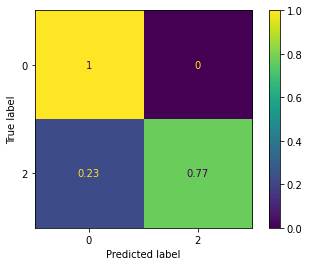

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm_gs2_norm, display_labels= gs2.classes_)
disp.plot();

In [100]:
logreg.fit(X_final_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
y_logreg_pred = logreg.predict(X_final_test)

In [102]:
logreg.predict_proba(X_final_test)

array([[0.97680145, 0.02319855],
       [0.93233369, 0.06766631],
       [0.96514914, 0.03485086],
       ...,
       [0.91496226, 0.08503774],
       [0.88361633, 0.11638367],
       [0.97556526, 0.02443474]])

In [103]:
logreg.score(X_final_test, y_test)

0.9442198030067392

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [105]:
cm_lr_norm = confusion_matrix(y_test, y_logreg_pred, normalize='true')

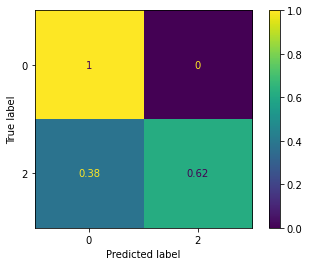

In [106]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm_lr_norm, display_labels= logreg.classes_)
disp.plot();

In [107]:
y_pred = gs.predict(X_final_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
gs.predict_proba(X_final_test)

array([[0.98858384, 0.01141616],
       [0.95726335, 0.04273665],
       [0.97854169, 0.02145831],
       ...,
       [0.9298305 , 0.0701695 ],
       [0.92521372, 0.07478628],
       [0.98668195, 0.01331805]])

In [109]:
gs.score(X_final_test, y_test)

0.9664074650077761

In [110]:
y_test.value_counts(normalize=True)

0    0.854121
2    0.145879
Name: status_of_loans, dtype: float64

## CREATION OF CONFUSION MATRIX 

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[8238,    0],
       [ 324, 1083]])

In [113]:
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

In [115]:
gs.classes_

array([0, 2])

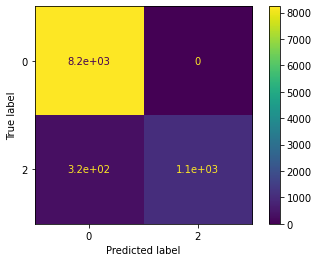

In [116]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= gs.classes_)
disp.plot();

In [117]:
NewX_new = np.concatenate([X_train_s, X_train_cat_new], axis=1)

In [118]:
#NewX_new

In [119]:
#pd.DataFrame(NewX_new)

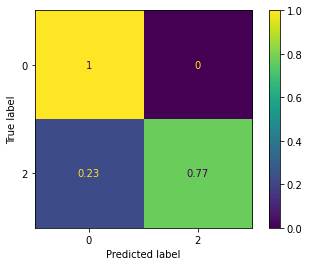

In [120]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm_norm, display_labels= gs.classes_)
disp.plot();

## RUNNING ENSEMBLE TO RUN MULTIPLE CLASSIFERS

In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [122]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [123]:
vc = VotingClassifier([
    ('lr', LogisticRegression(max_iter = 1000)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier())
])

In [124]:
vc.fit(X_final_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',...
                              DecisionTreeCl

In [125]:
vc.score(X_final_test, y_test)

0.9425609123898393

In [126]:
preds = vc.predict(X_final_test)

In [127]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score

In [128]:
balanced_accuracy_score(y_test, preds)

0.8084313113446399

In [129]:
from sklearn.metrics import plot_confusion_matrix

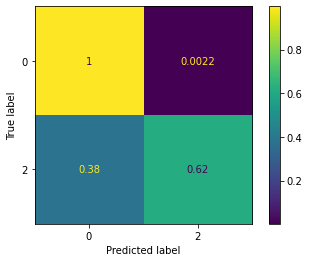

In [130]:
plot_confusion_matrix(vc, X_final_test, y_test, normalize='true');

In [131]:
recall_score(y_test, preds, average='weighted')

0.9425609123898393

In [132]:
precision_score(y_test, preds, average='weighted')

0.9447611474750021

In [133]:
f1_score(y_test, preds, average='weighted')

0.9369569134786951

## SOFT VOTING

In [134]:
vc_soft = VotingClassifier([
    ('lr', LogisticRegression(max_iter=1000)), 
    ('dt', DecisionTreeClassifier()), 
    ('knn', KNeighborsClassifier())
], voting='soft')

In [135]:
vc_soft.fit(X_final_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini'...
                                        

In [136]:
vc_soft.score(X_final_test, y_test)

0.9438050803525142

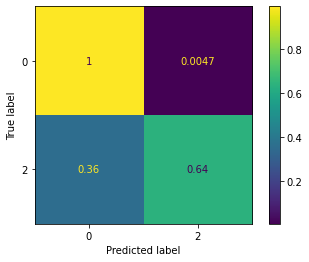

In [137]:
plot_confusion_matrix(vc_soft, X_final_test, y_test, normalize='true');

In [138]:
preds2 = vc_soft.predict(X_final_test)

In [139]:
balanced_accuracy_score(y_test, preds2)

0.8188838090268664

In [140]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [141]:
# rf = RandomForestClassifier(class_weight = {1:1, 2:3})

In [142]:
rf = RandomForestClassifier(class_weight = 'balanced')

In [143]:
rf.fit(X_final_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
rf.score(X_final_test, y_test)

0.96132711249352

In [145]:
preds3 = rf.predict(X_final_test)

In [146]:
balanced_accuracy_score(y_test, preds3)

0.8824767277958352

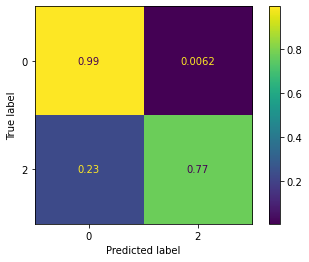

In [147]:
plot_confusion_matrix(rf, X_final_test, y_test, normalize='true');

In [148]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [149]:
y_test.value_counts(normalize=True)

0    0.854121
2    0.145879
Name: status_of_loans, dtype: float64

## Neural Net Classifier

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

bmodel = Sequential()

#What should the shape of our input layer be? Why?
bmodel.add(Input(shape=(46,)))

In [151]:
from tensorflow.keras.layers import BatchNormalization

In [152]:
#BatchNormalization  - drop out some weights, normalize them, helps the model to perform better
#good to add, won't hurt the model
bmodel.add(BatchNormalization())
bmodel.add(Dense(20, activation='relu'))
bmodel.add(Dense(20, activation='relu'))

In [153]:
#How many nodes would our final output layer have?
#What activation function would it have?

bmodel.add(Dense(1, activation='sigmoid'))

In [154]:
bmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [155]:
history = bmodel.fit(
    X_final_train,
    y_train,
    validation_split=.2,
    epochs=50,
)

Epoch 1/50
724/724 [==============================] - 2s 2ms/step - loss: -2.6418 - accuracy: 0.7541 - val_loss: -49.3399 - val_accuracy: 0.0567
Epoch 2/50
724/724 [==============================] - 1s 1ms/step - loss: -287.0822 - accuracy: 0.7237 - val_loss: -1050.9200 - val_accuracy: 0.5842
Epoch 3/50
724/724 [==============================] - 1s 1ms/step - loss: -2447.1183 - accuracy: 0.7097 - val_loss: -4075.9983 - val_accuracy: 0.3326
Epoch 4/50
724/724 [==============================] - 1s 1ms/step - loss: -8308.1606 - accuracy: 0.7119 - val_loss: -11782.7471 - val_accuracy: 0.3423
Epoch 5/50
724/724 [==============================] - 1s 1ms/step - loss: -20830.3470 - accuracy: 0.7014 - val_loss: -18336.2539 - val_accuracy: 0.0627
Epoch 6/50
724/724 [==============================] - 1s 1ms/step - loss: -40155.1210 - accuracy: 0.7035 - val_loss: -41840.9180 - val_accuracy: 0.1270
Epoch 7/50
724/724 [==============================] - 1s 1ms/step - loss: -70824.9566 - accuracy: 0.6

In [156]:
X_final_train.shape

(28932, 46)

In [157]:
preds = bmodel.predict(X_final_test)
preds

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [158]:
#similar to sklearn model.score
bmodel.evaluate(X_final_test, y_test)

302/302 [==============================] - 0s 889us/step - loss: -32364452.0000 - accuracy: 0.0731


[-32364452.0, 0.07309486716985703]

In [159]:
balanced_accuracy_score(y_test, preds)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.04278951201747997

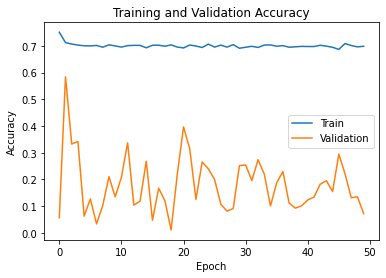

In [160]:
#drop in slack
#SLACK: Give me a :chart: if your plot looks similar to this
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.legend();

In [161]:
#X_train_s = pd.DataFrame(X_train_s)

In [162]:
#X_train_s

In [163]:
#NewX_new = pd.concat([X_train_s, X_train_cat_new], axis=1)

In [164]:
#NewX_new.shape

In [165]:
#X1 = loan_new[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'annual_inc']]

In [166]:
#X2 = loan_new[['grade']]

In [167]:
#X2

In [168]:
#y

In [169]:
#ohe.fit(X2, y)

In [170]:
#X2_cats = ohe.transform(X2, y)

In [171]:
#X2_cats.head()

In [172]:
#NewX = pd.concat([X1, X2_cats], axis=1)

In [173]:
#NewX.shape

In [174]:
#ss = StandardScaler()

In [175]:
#X1_s = ss.fit_transform(X1)

In [176]:
#X1_s

In [177]:
#NewX = pd.concat([X1_s, X2_cats], axis=1)

In [178]:
#X1_new_s = pd.DataFrame(X1_s)

In [179]:
#NewX = pd.concat([X1_new_s, X2_cats], axis=1)

In [180]:
#NewX.shape

In [181]:
#NewX